# libraries

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Data Access
Nous accèdons aux données. Nous allons les séparées en fake et true dataset.

In [3]:
fake_df=pd.read_csv("data/Fake.csv")
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true_df=pd.read_csv("data/True.csv")
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


# Data cleaning
Dans ce dataframe nous analysons si les données sont propres (si elles contiennet des Nan Values, si le type des variables est approprié est approprié. Dans un premier temps nous allons créer un dataframe globale qui contient l'intégralité des données et on va créer une colonne "IsFake" qui contient "True" ou "False" pour classifier les données.


In [5]:
# On ajoute à chaque dataframe la colonne "isFake"
fake_df["isFake"]=True
fake_df.head(1)

,title,text,subject,date,isFake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",True


In [6]:
true_df["isFake"]=False
true_df.head(1)

,title,text,subject,date,isFake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",False


In [7]:
df=pd.concat([fake_df,true_df])
df

,title,text,subject,date,isFake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",True
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",True
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",True
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",True
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",True
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",False
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",False
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",False
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",False


In [8]:
#nous allons maintenant adapter les types de données
# Dans quelle format sont les données ?

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
title      44898 non-null object
text       44898 non-null object
subject    44898 non-null object
date       44898 non-null object
isFake     44898 non-null bool
dtypes: bool(1), object(4)
memory usage: 1.8+ MB


In [9]:
# changer "date" en datetime
unique_dates = df['date'].unique()

invalid_format_dates = []

for date in unique_dates:
    try:
        # Essayer de convertir chaque date
        pd.to_datetime(date.strip(), format='%B %d, %Y')
    except ValueError:
        # Si une erreur se produit, ajouter la date à la liste des formats invalides
        invalid_format_dates.append(date)

print("Dates invalides:", invalid_format_dates)

Dates invalides: ['19-Feb-18', '18-Feb-18', '17-Feb-18', '16-Feb-18', '15-Feb-18', '14-Feb-18', 'Dec 31, 2017', 'Dec 30, 2017', 'Dec 29, 2017', 'Dec 28, 2017', 'Dec 27, 2017', 'Dec 26, 2017', 'Dec 25, 2017', 'Dec 24, 2017', 'Dec 23, 2017', 'Dec 22, 2017', 'Dec 21, 2017', 'Dec 20, 2017', 'Dec 19, 2017', 'Dec 18, 2017', 'Dec 17, 2017', 'Dec 16, 2017', 'Dec 15, 2017', 'Dec 14, 2017', 'Dec 13, 2017', 'Dec 12, 2017', 'Dec 11, 2017', 'Dec 10, 2017', 'Dec 9, 2017', 'Dec 8, 2017', 'Dec 7, 2017', 'Dec 6, 2017', 'Dec 5, 2017', 'Dec 4, 2017', 'Dec 3, 2017', 'Dec 2, 2017', 'Dec 1, 2017', 'Nov 30, 2017', 'Nov 29, 2017', 'Nov 28, 2017', 'Nov 27, 2017', 'Nov 26, 2017', 'Nov 25, 2017', 'https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/', 'Nov 24, 2017', 'Nov 23, 2017', 'Nov 22, 2017', 'Nov 21, 2017', 'Nov 20, 2017', 'Nov 19, 2017', 'Nov 18, 2017', 'Nov 17, 2017', 'Nov 16, 2017', 'Nov 15, 2017', 'Nov 14, 201

Nous pouvons voir que les données ne sont toutes du meme format, il va falloire changer cela. Nous pouvons identifier 3 formats qui ne respectent pas la forme suivante "Mois :
- 'd-MMM-yy' (comme '19-Feb-18')
- 'MMM d, yyyy' (comme 'Dec 31, 2017').
- "des URL de site" 

Concernant les URL nous allons éliminer ces lignes du dataset. Pour les autres valeurs nous allons concevoir un algorithme pour les transformer dans un dataframe convenable.

In [10]:
# filtrer et supprimer les URL, pour simplifier nous allons dire que si 
#la ligne contient le suit pas les formats 'd-MMM-yy' ou 'MMM d, yyyy'  
df['date']

0        December 31, 2017
1        December 31, 2017
2        December 30, 2017
3        December 29, 2017
4        December 25, 2017
               ...        
21412     August 22, 2017 
21413     August 22, 2017 
21414     August 22, 2017 
21415     August 22, 2017 
21416     August 22, 2017 
Name: date, Length: 44898, dtype: object

In [11]:
dates_numpy_array=df['date'].to_numpy()
dates_numpy_array

bad_format_indexes=[] # les index qui n'ont pas le bon format.
for i in range(len(dates_numpy_array)):
    tab=dates_numpy_array[i].replace(",","").split() # on enleve la virgule et
    if len(tab)!=3:
        bad_format_indexes.append(i) #si le nombre est différent de 3 alors le format n'est pas celui qu'on veut. 

bad_format_indexes

[9050,
 9051,
 9052,
 9053,
 9054,
 9055,
 9056,
 9057,
 9058,
 9059,
 9060,
 9061,
 9062,
 9063,
 9064,
 9065,
 9066,
 9067,
 9068,
 9069,
 9070,
 9071,
 9072,
 9073,
 9074,
 9075,
 9076,
 9077,
 9078,
 9079,
 9080,
 9081,
 9082,
 9083,
 9084,
 9358,
 15507,
 15508,
 15839,
 15840,
 17432,
 17433,
 18933,
 21869,
 21870]

Nous avons donc identifié que certaines données ne sont pas dans le format adéquat, nous avons 2 cas à traité:
- les dates au format D-MM-YY
- les urls et les string
Nous pouvons savoir que si le string dépasse une certainne longieur, alors c'est un url ou un long text et nous éliminons la row. Si par contre C'est une date du format d-MM-YY alors nous pouvons juste dansformer la donnée en format que l'on veut.


In [12]:
index_to_delete=[]
for index in bad_format_indexes:
    try: # si c'est un format D-M-Y alors on le change simplement
        date_str=dates_numpy_array[index]
        date_obj = datetime.strptime(date_str, '%d-%b-%y') # on selectionne l'objet avec le format D-M-Y en format datetime.
        new_format = date_obj.strftime('%B %d, %Y')
        dates_numpy_array[index]=new_format
    except: # c'est un long string que nous devrons éffacer.
        index_to_delete.append(index)
    

#nous avons donc modifié les formats des dates de D-M-Y.
dates_numpy_array

In [13]:
#mainteannt nous allons remplacer les lignes qui ont étée modifiées
df['date']=dates_numpy_array


In [14]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.date.isnull().unique()

array([False,  True])

Nous avons prouvé que il existe des nan values, donc nous allons eliminer les lignes.

In [15]:
# Éliminer les lignes où la colonne 'date' a des valeurs NaT
df = df.dropna(subset=['date'])
df.date.isnull().unique()

array([False])

Nous avons donc clean la colonne date. Nous verifions les autres colonnes.

In [16]:
df.columns

Index(['title', 'text', 'subject', 'date', 'isFake'], dtype='object')

In [17]:
df.title.isnull().unique()

array([False])

In [18]:
df.text.isnull().unique()

array([False])

In [19]:
df.subject.isnull().unique()

array([False])

Notre dataset est près à l'emplois.

# Data analysis + Visualisation
Nous avons plusieurs points à analyser avant de créer notre model, voici les questions sur lesquelles nous nous focalisons pour répondre aux questions:
Types de "subject" dans le DataFrame :

**Analyse de les sujets les plus présents**
- Combien de catégories uniques de "subject" existent-elles ?
- Y a-t-il une distribution inégale des sujets entre les news fake et vraies ?

**Sujet avec le plus de fake news ou de vraies news**
- Y a-t-il des sujets spécifiques plus susceptibles d'être associés à des fake news ?

**Analyse de la longueur des textes :**
- Quelle est la distribution de la longueur des textes pour les fake news par rapport aux vraies news ?
- La longueur du texte est-elle un indicateur potentiel de fiabilité ?
Répétition des titres :

**Repetition des titres:**
- Combien de titres se répètent et dans quel contexte (fake ou vrai) ?
- La répétition des titres est-elle un indicateur de news non fiables ?

**Analyse des dates :**
- Quelles sont les dates minimales et maximales ? Y a-t-il des tendances temporelles dans les fake news ?
- Y a-t-il des périodes spécifiques où les fake news sont plus fréquentes ?

**Titres identiques dans les datasets Fake et True :**
- Y a-t-il des cas où les mêmes titres apparaissent à la fois dans les fake news et les vraies news ?
- Quelle pourrait être la raison de ces chevauchements ?

**Comparaison des données fake et vraies :**
- Quels mots ou phrases sont communs dans les deux catégories ?
- Y a-t-il des patterns de langage ou de structuration spécifiques aux fake news ?

**Période avec le plus de fake news :**
- Analysez les tendances temporelles pour identifier des périodes avec une concentration élevée de fake news.
- En plus de ces questions, voici d'autres aspects à considérer pour enrichir votre analyse :

**Sentiment Analysis :**
- Quel est le ton général (positif, négatif, neutre) des fake news par rapport aux vraies news ?
- Les fake news tendent-elles à utiliser un langage plus émotionnel ou provocateur ?

**Analyse de la source et de l'auteur :**
- Existe-t-il des sources ou des auteurs spécifiques qui sont plus susceptibles de publier des fake news ?
- Comment la crédibilité de la source affecte-t-elle la fiabilité de l'information ?

**Corrélation entre le sujet et la période temporelle :**
- Y a-t-il des sujets qui deviennent plus prévalents à certaines périodes, et sont-ils liés à des événements réels (par exemple, élections, crises) ?

**Utilisation de techniques NLP avancées :**
- Quelles sont les caractéristiques linguistiques (par exemple, n-grammes, term frequency-inverse document frequency (TF-IDF)) qui distinguent le mieux les fake news des vraies news ?

L'analyse va nous permettre des réponse à ces questions.

**Combien de catégories uniques de "subject" existent-elles ?**

In [20]:
print(f"Nous avons {len(df.subject.unique())} sujets différents")

Nous avons 8 sujets différents


**Y a-t-il une distribution inégale des sujets entre les news fake et vraies ?**

In [24]:
df.groupby('subject')['isFake'].value_counts()

subject          isFake
Government News  True       1568
Middle-east      True        778
News             True       9050
US_News          True        783
left-news        True       4456
politics         True       6836
politicsNews     False     11272
worldnews        False     10145
Name: isFake, dtype: int64

In [22]:
# Grouper par 'subject' et compter les occurrences de True et False dans 'isFake'
count_by_subject = df.groupby('subject')['isFake'].value_counts().unstack().fillna(0)

# Afficher le résultat
print(count_by_subject)

isFake             False   True 
subject                         
Government News      0.0  1568.0
Middle-east          0.0   778.0
News                 0.0  9050.0
US_News              0.0   783.0
left-news            0.0  4456.0
politics             0.0  6836.0
politicsNews     11272.0     0.0
worldnews        10145.0     0.0


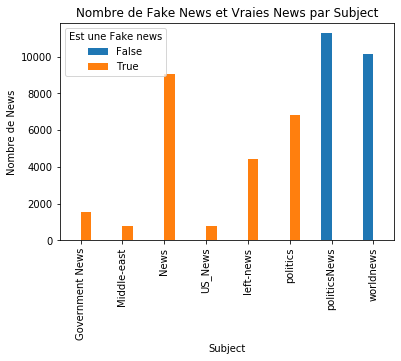

In [23]:
# Créer un graphique à barres empilées
count_by_subject.plot(kind='bar')

# Ajouter des titres et labels
plt.title('Nombre de Fake News et Vraies News par Subject')
plt.xlabel('Subject')
plt.ylabel('Nombre de News')

# Afficher la légende
plt.legend(title="Est une Fake news",loc="upper left")

# Afficher le graphique
plt.show()


La distribution des fake news et des true news est assez biaisé si on les reproupe par subject, il serait envisageable qu'elle ne soit pas un bonne estimateur pour détecter les fake news. Il serait envisageable:
- Soit enlever des données de la classe majoritaire.
- Soit utiliser des techniques comme SMOTE pour générer des nouvelles données de la classe minoritaire.
- soit enlever la colonne "subject" du dataset. (car à la fin, ce sont des news, peut importe d'où elles viennent.)